### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# linear algebra and data processing
import numpy as np 
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline




### Loading the Data

In [2]:
df =  pd.read_csv(r'C:\Users\rajes\Downloads\concrete.csv')
data = df.copy()

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
data.shape


(1030, 9)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


We can observe the mean,standard deviation, Q1(25%) and Q3(75%) values from above.

In [7]:
# checking null values

data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

As there are no missing values we will findout any outliers present in this data

### Outliers

In [8]:
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

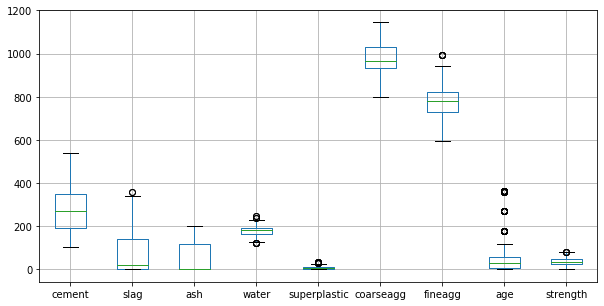

In [9]:
plt.figure(figsize=(10,5))
data.boxplot()
plt.show()

-Age column appears to be having maximum number of outliers and Slag, Water, superplastic, fineagg features have some outliers



In [10]:
print('outliers in cement      : ',data[((data.cement-data.cement.mean())/data.cement.std()).abs()>3]['cement'].count())
print('outliers in slag        : ',data[((data.slag-data.slag.mean())/data.slag.std()).abs()>3]['slag'].count())
print('outliers in ash         : ',data[((data.ash-data.ash.mean())/data.ash.std()).abs()>3]['ash'].count())
print('outliers in water       : ',data[((data.water-data.water.mean())/data.water.std()).abs()>3]['water'].count())
print('outliers in superplastic: ',data[((data.superplastic-data.superplastic.mean())/data.superplastic.std()).abs()>3]['superplastic'].count())
print('outliers in coarseagg   : ',data[((data.coarseagg-data.coarseagg.mean())/data.coarseagg.std()).abs()>3]['coarseagg'].count())
print('outliers in fineagg     : ',data[((data.fineagg-data.fineagg.mean())/data.fineagg.std()).abs()>3]['fineagg'].count())
print('outliers in age         : ',data[((data.age-data.age.mean())/data.age.std()).abs()>3]['age'].count())



outliers in cement      :  0
outliers in slag        :  4
outliers in ash         :  0
outliers in water       :  2
outliers in superplastic:  10
outliers in coarseagg   :  0
outliers in fineagg     :  0
outliers in age         :  33


In [11]:
for x in data.columns[:-1]:
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    low = Q1-1.5*IQR
    high = Q3+1.5*IQR


In [12]:
for x in data.columns[:-1]:
    Q1=data[x].quantile(0.25)
    Q3=data[x].quantile(0.75)
    IQR=Q3-Q1
    low = Q1-1.5*IQR
    high = Q3+1.5*IQR
    data.loc[ (data[x] < low) | (data[x] > high), x]  = data[x].median()

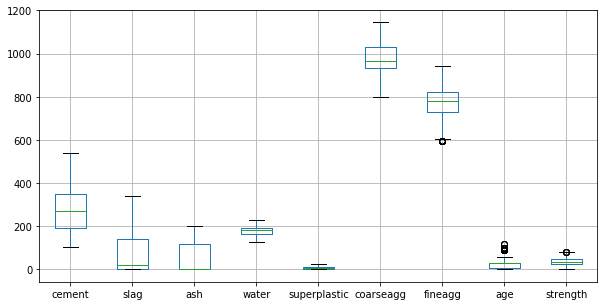

In [13]:
plt.figure(figsize=(10,5))
data.boxplot()
plt.show()

In [14]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Exploratory data analysis

#### Checking the pairwise relations of Features

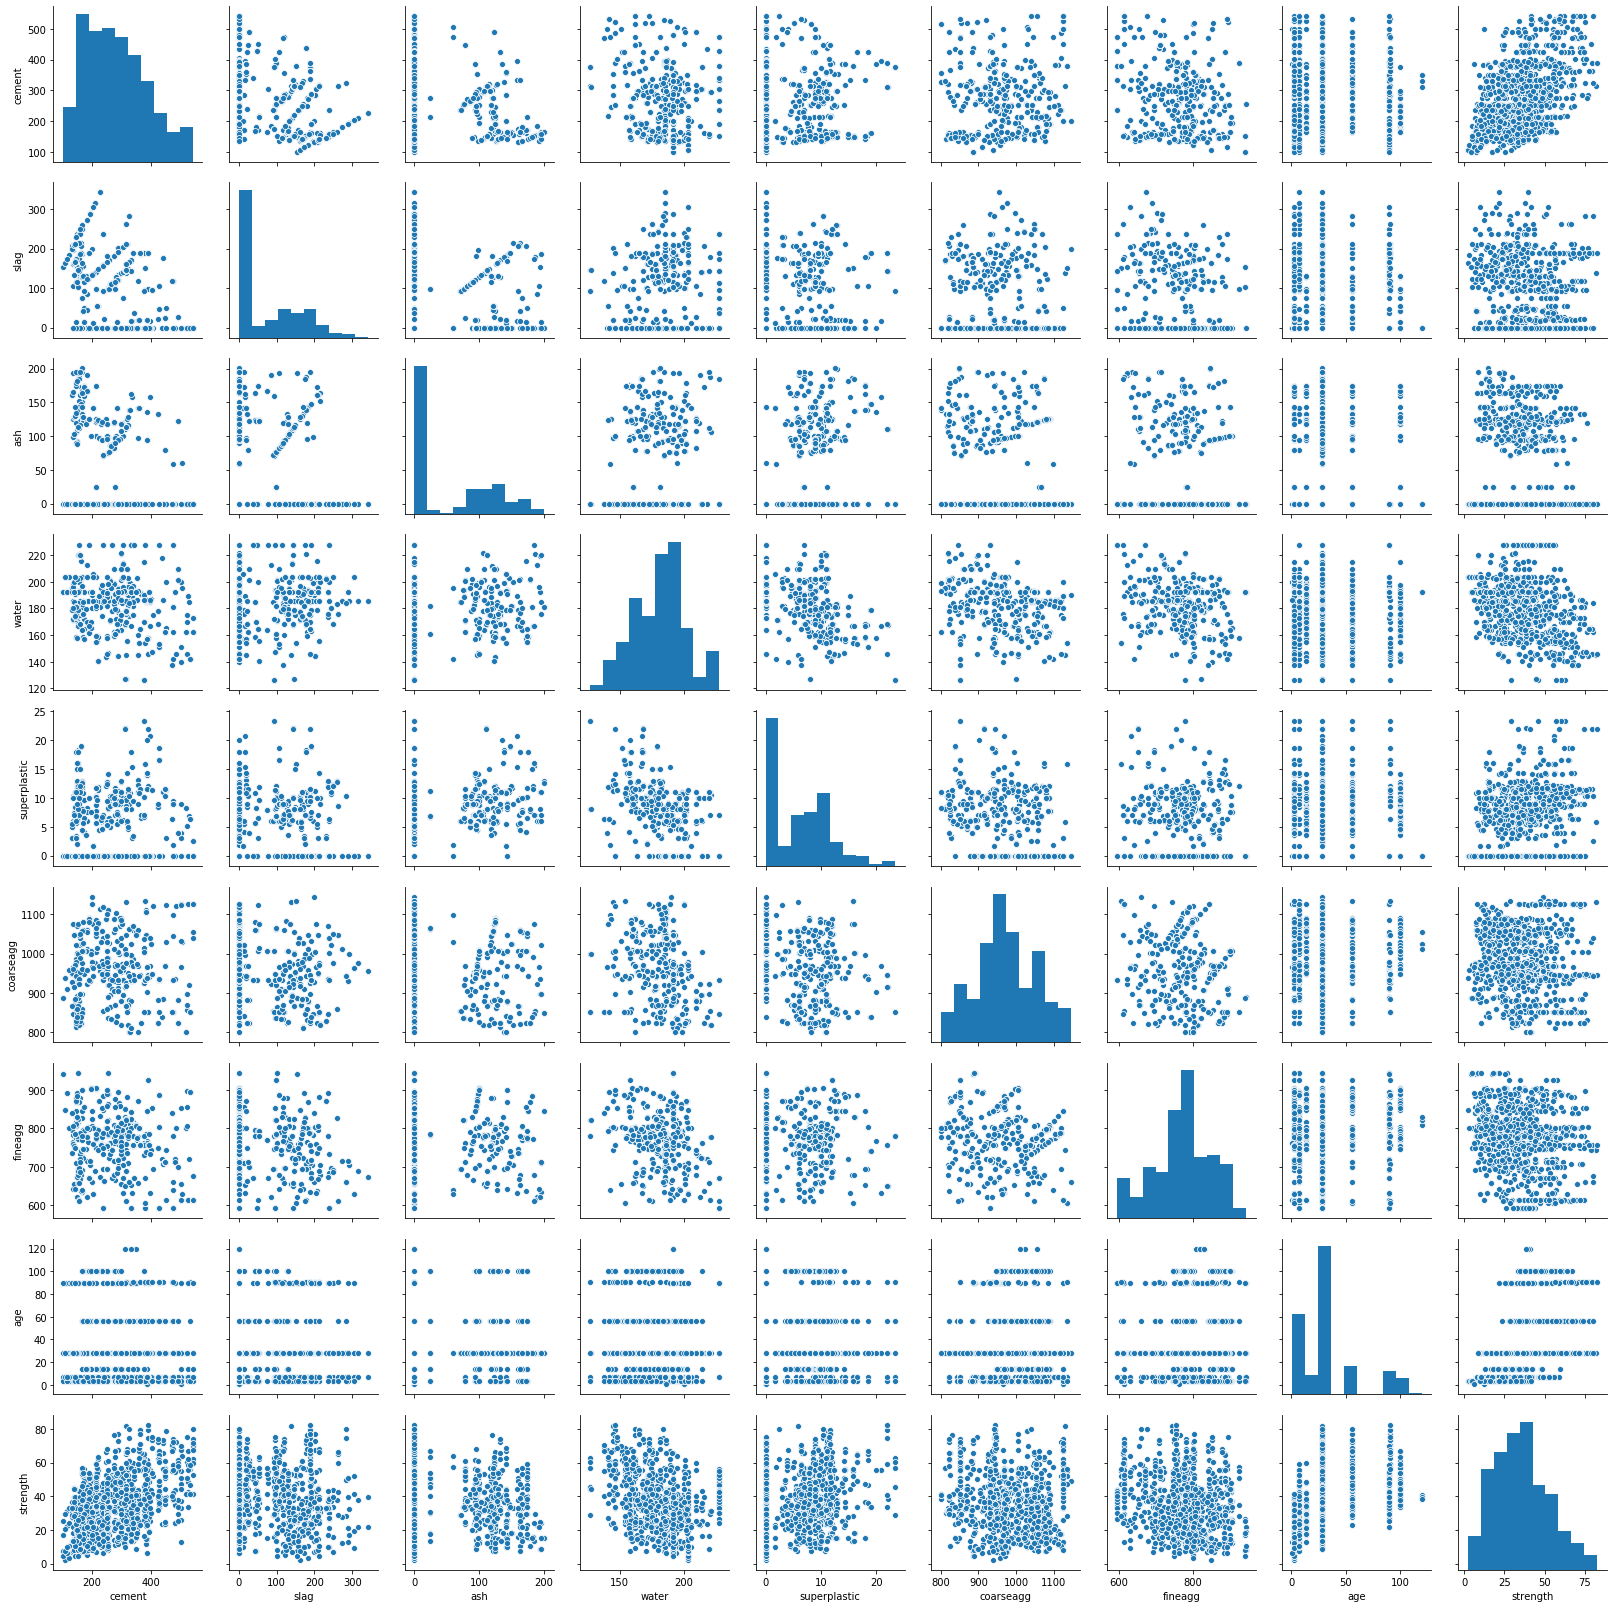

In [15]:
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Strength Distribution')

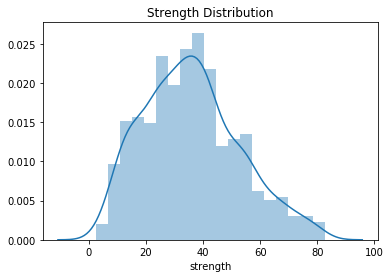

In [16]:
ax = sns.distplot(data.strength)
ax.set_title("Strength Distribution")

### Heatmap

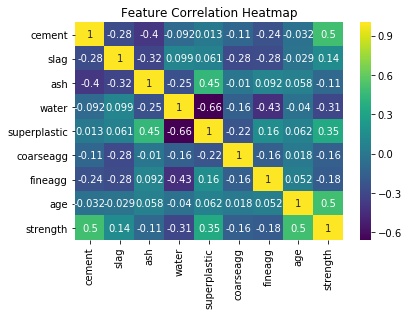

In [17]:
correlation = data.corr()  # pairwise correlation of all columns

sns.heatmap(correlation, annot=True, cmap='viridis')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

-cement and age and  have strong correlation with strength


### Model building

In [18]:
# Splitting the data into indipendent and dependent variable 

x = data.drop('strength',axis = 1)  # Independent Variables
y = data['strength']                # Dependdent Variable Target Variable

In [19]:
x.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split # random sampling

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

# Linear Regression

model_linear = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

# Fitting models on Training data 
model_linear.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)
model_ridge.fit(x_train, y_train)

# Making predictions on Test data
y_pred_lr = model_linear.predict(x_test)
y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)


#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

model_randomforest = RandomForestRegressor()

# Fitting models on Training data 
model_randomforest.fit(x_train,y_train)

# Making predictions on Test data
y_pred_rfr =model_randomforest.predict(x_test)


#### GradientBoostingRegressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

model_grb = GradientBoostingRegressor(random_state = 1)

# Fitting models on Training data 
model_grb.fit(x_train,y_train)

# Making predictions on Test data
y_pred_grb =model_grb.predict(x_test)


#### Adaboost

In [26]:
from sklearn.ensemble import AdaBoostRegressor


model_adb = AdaBoostRegressor()

# Fitting models on Training data 
model_adb.fit(x_train,y_train)

# Making predictions on Test data
y_pred_adb =model_adb.predict(x_test)


#### KNN 

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate Learning model ( k = 3)
model_knn = KNeighborsRegressor(n_neighbors= 3)

# Fitting the model
model_knn.fit(x_train,y_train)

# Predicting the test results
y_pred_knn = model_knn.predict(x_test)


#### bagging and boosting regression

In [28]:
from sklearn.ensemble import BaggingRegressor


model_bag = BaggingRegressor(random_state = 1)

# Fitting the model
model_bag.fit(x_train,y_train)

# Predicting the test results
y_pred_bag = model_bag.predict(x_test)


## support vector machine

In [29]:
from sklearn.svm import SVR

model_svm = SVR(kernel='linear')

# Fitting the model
model_svm.fit(x_train,y_train)

# Predicting the test results
y_pred_svm = model_svm.predict(x_test)


#### DecisionTree

In [31]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

# Fitting the model
model_dt.fit(x_train,y_train)


# Predicting the test results
y_pred_dt = model_dt.predict(x_test)

In [59]:
model_adb_score = model_adb.score(x_test,y_test)
model_bag_score = model_bag.score(x_test,y_test)
model_dt_score = model_dt.score(x_test,y_test)
model_grb_score = model_grb.score(x_test,y_test)
model_knn_score = model_knn.score(x_test,y_test)
model_lasso_score = model_lasso.score(x_test,y_test)
model_linear_score = model_linear.score(x_test,y_test)
model_randomforest_score = model_randomforest.score(x_test,y_test)
model_ridge_score = model_ridge.score(x_test,y_test)
model_svm_score = model_svm.score(x_test,y_test)


In [60]:
RMSE_linear = np.sqrt(mean_squared_error(y_test, y_pred_lr))
RMSE_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
RMSE_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
RMSE_grb = np.sqrt(mean_squared_error(y_test, y_pred_grb))
RMSE_adb = np.sqrt(mean_squared_error(y_test, y_pred_adb))
RMSE_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
RMSE_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

RMSE_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))


In [63]:
models = ["model_adb",'model_bag','model_dt','model_grb','model_knn','model_lasso','model_linear',
          'model_randomforest','model_ridge','model_svm']
model_accuracy = pd.DataFrame({'Algorithm':['model_adb','model_bag','model_dt','model_grb',
                                    'model_knn','model_lasso', 'model_linear', 'model_randomforest','model_ridge',
                                    'model_svm'],
                       'Accuracy':[model_adb_score, model_bag_score, model_dt_score,
                          model_grb_score, model_knn_score, model_lasso_score, model_linear_score,
                          model_randomforest_score, model_ridge_score, model_svm_score],
                               
                               
                      'RMSE':[RMSE_adb,RMSE_bag,RMSE_dt,RMSE_grb,RMSE_knn,RMSE_lasso,RMSE_linear,RMSE_rfr,
                              RMSE_ridge,RMSE_svm,]})

In [64]:
model_accuracy 

,Algorithm,Accuracy,RMSE
0,model_adb,0.725039,8.998192
1,model_bag,0.834353,6.984113
2,model_dt,0.748227,8.610432
3,model_grb,0.825937,7.159350
4,model_knn,0.742934,8.700459
5,model_lasso,0.553275,11.469381
6,model_linear,0.558976,11.395964
7,model_randomforest,0.840233,6.859035
8,model_ridge,0.559018,11.395420
9,model_svm,0.558329,11.404319


### Feature Importance

In [38]:
print(pd.DataFrame(model_dt.feature_importances_,columns=['Important'],index =x.columns ))

              Important
cement         0.356220
slag           0.095410
ash            0.012313
water          0.126951
superplastic   0.017624
coarseagg      0.032058
fineagg        0.030871
age            0.328552


As we can see cement, water and age are the most important features. 

## Model building 2

In [37]:
# Splitting the data into indipendent and dependent variable 

x = data.drop(columns=['slag','ash','superplastic','coarseagg','fineagg','strength'])  # Independent Variables
y = data['strength']                # Dependdent Variable Target Variable




In [38]:
x.columns

Index(['cement', 'water', 'age'], dtype='object')

In [39]:
from sklearn.model_selection import train_test_split # random sampling

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

# Linear Regression

model_linear = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

# Fitting models on Training data 
model_linear.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)
model_ridge.fit(x_train, y_train)

# Making predictions on Test data
y_pred_lr = model_linear.predict(x_test)
y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)


#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

model_randomforest = RandomForestRegressor()

# Fitting models on Training data 
model_randomforest.fit(x_train,y_train)

# Making predictions on Test data
y_pred_rfr =model_randomforest.predict(x_test)


#### GradientBoostingRegressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

model_grb = GradientBoostingRegressor(random_state=42, max_depth=4)

# Fitting models on Training data 
model_grb.fit(x_train,y_train)

# Making predictions on Test data
y_pred_grb =model_grb.predict(x_test)


#### Adaboost

In [44]:
from sklearn.ensemble import AdaBoostRegressor


model_adb = AdaBoostRegressor()

# Fitting models on Training data 
model_adb.fit(x_train,y_train)

# Making predictions on Test data
y_pred_adb =model_adb.predict(x_test)


#### KNN 

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate Learning model ( k = 3)
model_knn = KNeighborsRegressor(n_neighbors= 3)

# Fitting the model
model_knn.fit(x_train,y_train)

# Predicting the test results
y_pred_knn = model_knn.predict(x_test)


#### bagging and boosting regression

In [46]:
from sklearn.ensemble import BaggingRegressor


model_bag = BaggingRegressor(random_state = 1)

# Fitting the model
model_bag.fit(x_train,y_train)

# Predicting the test results
y_pred_bag = model_bag.predict(x_test)


## support vector machine

In [47]:
from sklearn.svm import SVR

model_svm = SVR(kernel='linear')

# Fitting the model
model_svm.fit(x_train,y_train)

# Predicting the test results
y_pred_svm = model_svm.predict(x_test)


#### DecisionTree

In [49]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

# Fitting the model
model_dt.fit(x_train,y_train)


# Predicting the test results
y_pred_dt = model_dt.predict(x_test)

In [50]:
model_adb_score = model_adb.score(x_test,y_test)
model_bag_score = model_bag.score(x_test,y_test)
model_dt_score = model_dt.score(x_test,y_test)
model_grb_score = model_grb.score(x_test,y_test)
model_knn_score = model_knn.score(x_test,y_test)
model_lasso_score = model_lasso.score(x_test,y_test)
model_linear_score = model_linear.score(x_test,y_test)
model_randomforest_score = model_randomforest.score(x_test,y_test)
model_ridge_score = model_ridge.score(x_test,y_test)
model_svm_score = model_svm.score(x_test,y_test)


In [51]:
RMSE_linear = np.sqrt(mean_squared_error(y_test, y_pred_lr))
RMSE_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
RMSE_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
RMSE_grb = np.sqrt(mean_squared_error(y_test, y_pred_grb))
RMSE_adb = np.sqrt(mean_squared_error(y_test, y_pred_adb))
RMSE_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
RMSE_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
RMSE_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))


In [66]:
models = ["model_adb",'model_bag','model_dt','model_grb','model_knn','model_lasso','model_linear',
          'model_randomforest','model_ridge','model_svm']
model_accuracy = pd.DataFrame({'Algorithm':['model_adb','model_bag','model_dt','model_grb',
                                    'model_knn','model_lasso', 'model_linear', 'model_randomforest','model_ridge',
                                    'model_svm',],
                       'Accuracy':[model_adb_score, model_bag_score, model_dt_score,
                          model_grb_score, model_knn_score, model_lasso_score, model_linear_score,
                          model_randomforest_score, model_ridge_score, model_svm_score],
                               
                               
                      'RMSE':[RMSE_adb,RMSE_bag,RMSE_dt,RMSE_grb,RMSE_knn,RMSE_lasso,RMSE_linear,RMSE_rfr,
                              RMSE_ridge,RMSE_svm]})

In [67]:
model_accuracy 

,Algorithm,Accuracy,RMSE
0,model_adb,0.725039,8.998192
1,model_bag,0.834353,6.984113
2,model_dt,0.748227,8.610432
3,model_grb,0.825937,7.159350
4,model_knn,0.742934,8.700459
5,model_lasso,0.553275,11.469381
6,model_linear,0.558976,11.395964
7,model_randomforest,0.840233,6.859035
8,model_ridge,0.559018,11.395420
9,model_svm,0.558329,11.404319


### Hyper parameter tuning

In [68]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [56]:
rf = RandomForestRegressor()

In [57]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                                random_state=42, n_jobs = 1)


In [69]:

# Fit the random search model

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, m

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(x.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

   importance feature
0    0.437881  cement
1    0.330763     age
2    0.231356   water


### Conclusion¶

In the above analysis, we found that the features that affect the strength are cement, water, and age to predict the strength.

The best model is RandomForest .

Using the above model, we can predict the strength accurately.